In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

# LN3
## 2 주택실거래가 히스토그램
### subplots 뒤부터 이어서

- [0] , [1] 인 이유는 파이썬은 0부터 시작하니까

- 서초구 아파트 매매 중에서 서초동과 반포동을 추출하여 히스토그램으로 비교해보자

In [2]:
df=pd.read_csv('c:/temp/house_price1.csv')
df

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
0,0,2021,6,1,150000,1988,방배동,방배임광,82.34,11650,24.726727,6066.310420,24.951515,6011.658975
1,1,2021,6,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,44.741742,3464.326465,45.148485,3433.116317
2,2,2021,6,2,290000,1983,방배동,방배신삼호,185.46,11650,55.693694,5207.052734,56.200000,5160.142349
3,3,2021,6,2,210000,2006,방배동,롯데캐슬헤론,169.08,11650,50.774775,4135.911994,51.236364,4098.651526
4,4,2021,6,2,175000,1992,방배동,대우(효령),84.91,11650,25.498498,6863.149217,25.730303,6801.319044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,191,2021,6,24,147000,2014,내곡동,서초더샵포레,59.69,11650,17.924925,8200.871168,18.087879,8126.989445
192,192,2021,6,28,160000,2014,내곡동,서초더샵포레,84.81,11650,25.468468,6282.278033,25.700000,6225.680934
193,193,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572
194,194,2021,6,3,192500,2014,신원동,서초포레스타5단지,101.35,11650,30.435435,6324.864332,30.712121,6267.883572


In [4]:
# 서초동, 반포동 데이터를 각각 만든다
# iloc 사용하기 어려운 이유; 반포동, 서초동이 몇 번에 있는지 모르니까
# isin 함수: dong_name에 서초동이 포함되 있으면 갖고 와랏

df1=df.loc[df['dong_name'].isin(['서초동'])]
df2=df.loc[df['dong_name'].isin(['반포동'])]
df2

,Unnamed: 0,year,month,day,price,built_yr,dong_name,apt_name,size,gu_code,size_pyung,price_pyung,size_p,price_p
108,108,2021,6,7,304000,2009,반포동,반포자이,84.9820,11650,25.520120,11912.169636,25.752121,11804.852792
109,109,2021,6,11,270000,1974,반포동,에이아이디차관주택,72.5100,11650,21.774775,12399.669011,21.972727,12287.960281
110,110,2021,6,11,110000,2002,반포동,태평아트,78.6000,11650,23.603604,4660.305344,23.818182,4618.320611
111,111,2021,6,11,293000,2010,반포동,반포리체,84.9670,11650,25.515616,11483.164052,25.747576,11379.712124
112,112,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324,48.318182,4594.543744
113,113,2021,6,11,510000,2016,반포동,아크로리버파크,129.9700,11650,39.030030,13066.861583,39.384848,12949.142110
114,114,2021,6,11,126900,2002,반포동,타운빌,108.1200,11650,32.468468,3908.407325,32.763636,3873.196448
115,115,2021,6,11,251000,1974,반포동,에이아이디차관주택,72.5100,11650,21.774775,11527.099710,21.972727,11423.251965
116,116,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324,48.318182,4594.543744
117,117,2021,6,11,222000,2001,반포동,상지리츠빌(73-2),159.4500,11650,47.882883,4636.312324,48.318182,4594.543744


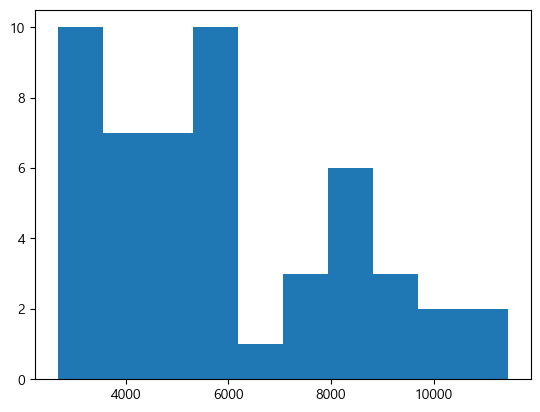

In [5]:
# 서초동 평당 가격 히스토그램
plt.hist(df1['price_p']) 
plt.show()

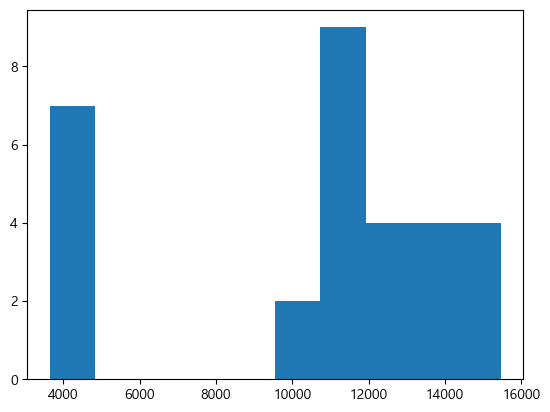

In [6]:
# 반포동 평당 가격 히스토그램
plt.hist(df2['price_p']) 
plt.show()

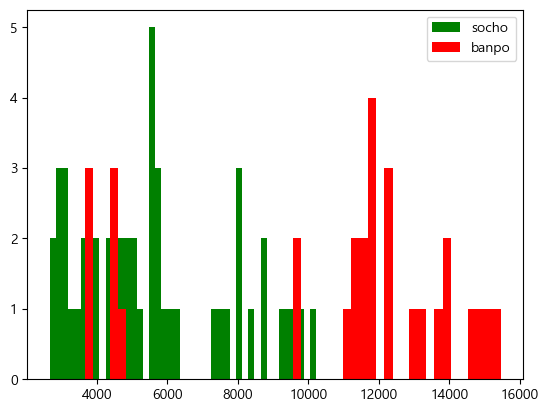

In [10]:
# 같이 실행하면 두 히스토그램이 따로 나오는게 아니라, 두개가 겹쳐서 나옴
plt.hist(df1['price_p'], bins=50,color='green',label='socho') 
plt.hist(df2['price_p'], bins=50, color='red',label='banpo') 
plt.legend() # 위에 지정한 레이블이 나오게 하기 위한 것
plt.show()

<AxesSubplot:xlabel='price_p', ylabel='Count'>

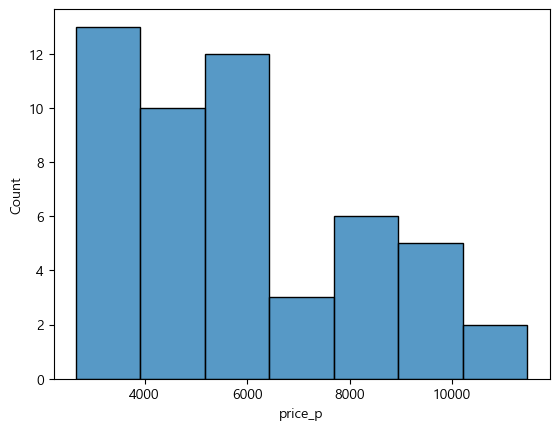

In [11]:
# sns package로 그려보자

sns.histplot(df1['price_p'])

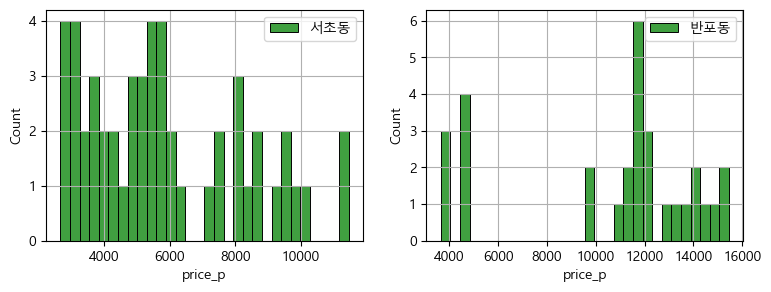

In [12]:
# sns.histplot을 이용해서도 2개 plot(서초동과 반포동) 이어서 그릴 수 있음

fig,axes=plt.subplots(1,2)
fig.set_size_inches(9,3)
x0=df1['price_p']
x1=df2['price_p']
bins=30

sns.histplot(x0,bins=bins, color='green',label='서초동',ax=axes[0])
sns.histplot(x1,bins=bins, color='green',label='반포동',ax=axes[1])

axes[0].grid()
axes[0].legend()
axes[1].grid()
axes[1].legend()
plt.show()

#### density plot

히스토그램을 자연스러운 곡선으로 연결해 그리는 것
- 함수는 kdeplot
- kernel density plot
- kernel: 히스토그램에 막대기를 자연스럽게 연결한 거
- density 밀도: 항상 0에 가까운 값은 아님. 지금 밑변 단위가 커서 그런것. 필기참고 

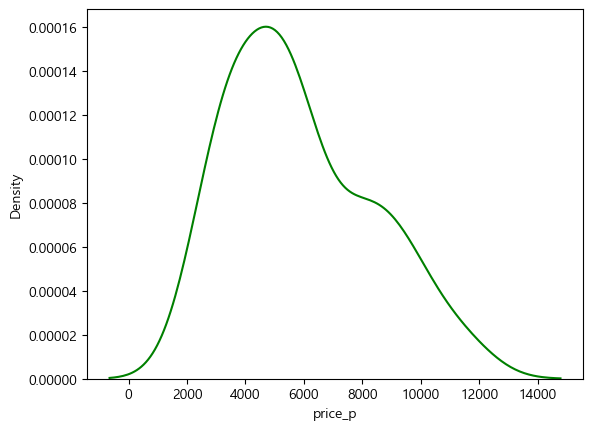

In [14]:
# 서초동의 density plot을 그리고자 한다
sns.kdeplot(df1['price_p'],color='green',label='socho')
plt.show()

In [16]:
# 피크에서 한 5000쯤에서 많이 거래됬구나, 높은 가격대도 조금씩 존재하는 구나
# 분포, 최대 최소 이런거 보는거에 도움이됨

# x축: 가격
# y축: density 필기참고

<AxesSubplot:xlabel='price_p', ylabel='Density'>

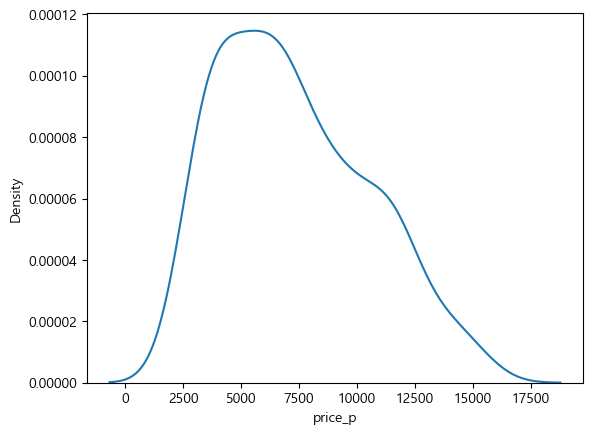

In [18]:
# 평당 아파트 가격에 대한 동별 히스토그램 그려보자
# 겹쳐서 그려보자. 그러면 동별 비교가 가능하다

# 서초구 8개 동의 kdeplot을 동시에 겹치게 그린다. 서로 비교를 위해서

sns.kdeplot(data=df,x='price_p')
# 이건 서초구 전체의 가격 분포

<AxesSubplot:xlabel='price_p', ylabel='Density'>

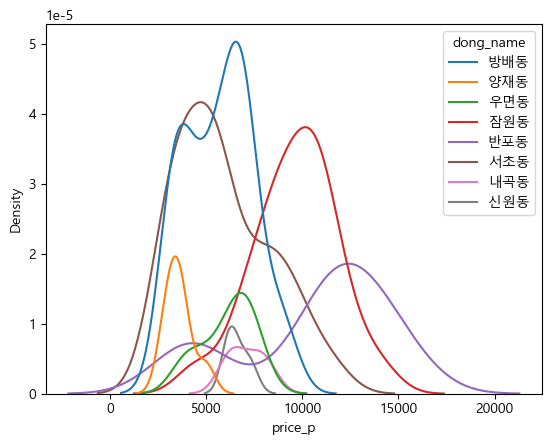

In [19]:
# hue 옵션사용해서 각각 동 그리고 겹쳐보자
sns.kdeplot(data=df,x='price_p',hue='dong_name')

In [20]:
# 반포동에 비싼 집 몰려있구나
# 상대적으로는 양재동이 싸구나

# 반포동과 양재동 차이 큼: 분산이 다름. 양재동은 거의 3000에서 다몰려이쏙, 반포는 분산이 큼


<AxesSubplot:>

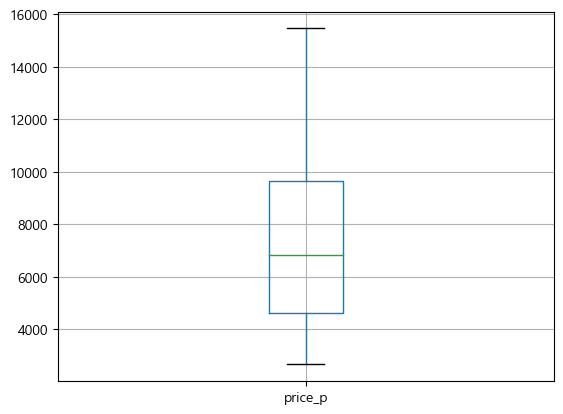

In [22]:
# price_p(아파트평당가격)의 분포 살펴보고 있다.

# box plot
df.boxplot(column='price_p')

<AxesSubplot:title={'center':'price_p'}, xlabel='dong_name'>

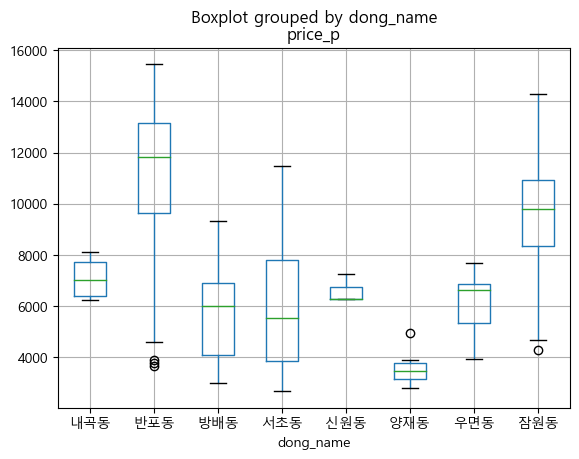

In [23]:
# 동별로 그리겠다
df.boxplot(column='price_p',by='dong_name')

In [24]:
# boxplot 해석 공부하기

<AxesSubplot:ylabel='price_p'>

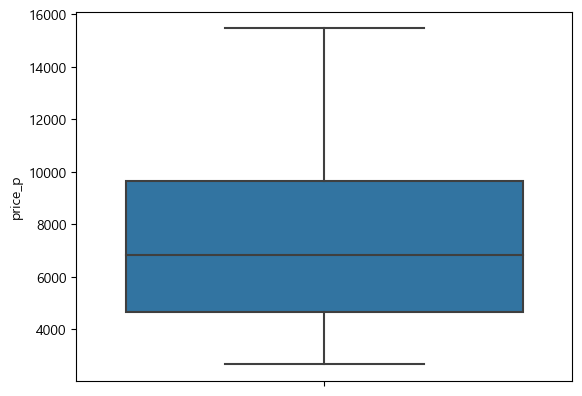

In [26]:
# sns 에서 boxplot 그려보기

# 서초구 전체 boxplot
sns.boxplot(data=df, y='price_p')

<AxesSubplot:xlabel='dong_name', ylabel='price_p'>

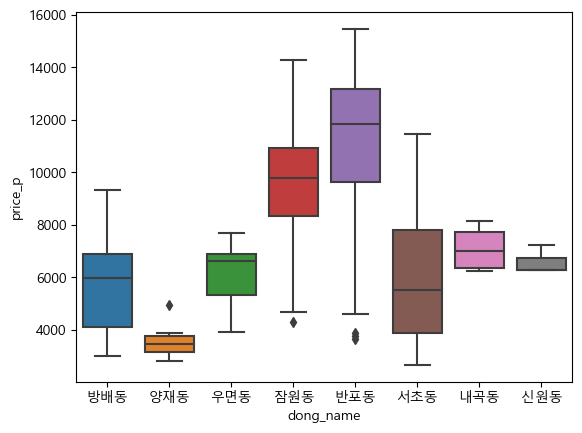

In [28]:
sns.boxplot(data=df, y='price_p', x='dong_name')
# 서초구 동별 boxplot
# y축에 가격적는거임!! 주의!!